# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 2383 Шмонова Наталья Александровна и Сериков Магжан. Вариант №11.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

## 1. Дискретный сигнал и его представление

Дискретный сигнал формируется путем дискретизации непрерывного сигнала с шагом $T$:
$$x[n] = x(nT), \quad n = 0, 1, 2, ..., N-1$$

Исходный аналоговый сигнал представляет собой линейную комбинацию гармоник:
$$x(t) = \sum_{k=1}^{11} A_k \cos(\omega_k t + \phi_k)$$
где $\omega_k \in [0, \pi]$ - частоты гармоник, $A_k$ - амплитуды, $\phi_k$ - начальные фазы.

## 2. Дискретное преобразование Фурье (ДПФ)

Для периодической последовательности ${x_k}$ с периодом $N$ ДПФ определяется как:
$$X(n) = \sum_{k=0}^{N-1} x_k e^{-i \frac{2\pi n}{N}k}, \quad n = 0...N-1$$

Спектр дискретного сигнала вычисляется через ДПФ по формуле:
$$X(n) = S\left(\frac{2\pi n}{N}\right)$$
где $S(\omega)$ - спектральная плотность сигнала.

## 3. Полиномиальные фильтры скользящего среднего

Общая форма нерекурсивного фильтра:
$$y_n = \sum_{k=0}^M c_k x_{n-k}$$
где $M$ - размер окна фильтрации.

### Линейное сглаживание

Для полинома первой степени $y(t) = A + Bt$ передаточная функция имеет вид:
$$\tilde{H}_{2h+1}(f) = \frac{1}{2h+1} \cdot \frac{\sin(2\pi f(h + \frac{1}{2}))}{\sin(\pi f)}$$

**Практическая реализация:**
- Для 5 точек ($h=2$):
$$y_n = \frac{1}{5}(s_{n-2} + s_{n-1} + s_n + s_{n+1} + s_{n+2})$$
- Для 9 точек ($h=4$):
$$y_n = \frac{1}{9}(s_{n-4} + s_{n-3} + s_{n-2} + s_{n-1} + s_n + s_{n+1} + s_{n+2} + s_{n+3} + s_{n+4})$$


## 4. Формула для численного дифференцирования 1-го порядка:

$ s'_n = \cfrac{s_{n + 1} - s_{n - 1}}{2} $

Передаточная функция:

$ H(\omega) = i \sin(\omega) $


## 5. Квадратурные формулы для численного интегрирования:

**Формула прямоугольников:**

$ y_{n+1} = y_n + s_{n+\frac{1}{2}} $

Передаточная функция:

$ H(\omega) = \cfrac{1}{2i\sin(\omega/2)} $

**Формула трапеций:**

$ y_{n+1} = y_n + \frac{1}{2}(s_n + s_{n+1}) $

Передаточная функция:

$ H(\omega) = \cfrac{\cos(\omega/2)}{2i\sin(\omega/2)} $

**Формула Симпсона:**

$ y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1} + 4s_n + s_{n+1}) $

Передаточная функция:

$ H(\omega) = \cfrac{2 + \cos(\omega)}{3i\sin(\omega)} $

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

Для выполнения лабораторной работы подключим необходимые библиотеки.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Задание 1

Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos(\omega_k t+\phi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\phi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N=31$).


In [23]:
# Параметры
num_harmonics = 11
delta_omega = 0.1 * np.pi
frequencies = np.array([k * delta_omega for k in range(num_harmonics)])
N = 31  # количество отсчетов
T = 1   # шаг дискретизации
t = np.linspace(0, N * T, N + 1)

# Генерация случайных амплитуд и фаз
A_k = np.random.randint(1, 12, size=num_harmonics)
phi_k = np.random.uniform(0, 0.5, size=num_harmonics)

# Нормализация амплитуд
A_k_normalized = A_k / np.sum(A_k)

# Формирование сигнала
signal_continuous = np.zeros_like(t)
signal_discrete = np.zeros(N + 1)

for k in range(num_harmonics):
    signal_continuous += A_k_normalized[k] * np.cos(frequencies[k] * t + phi_k[k])
    signal_discrete += A_k_normalized[k] * np.cos(frequencies[k] * t + phi_k[k])

## Задание 2
Визуализировать исходные аналоговый и дискретизированный сигналы.

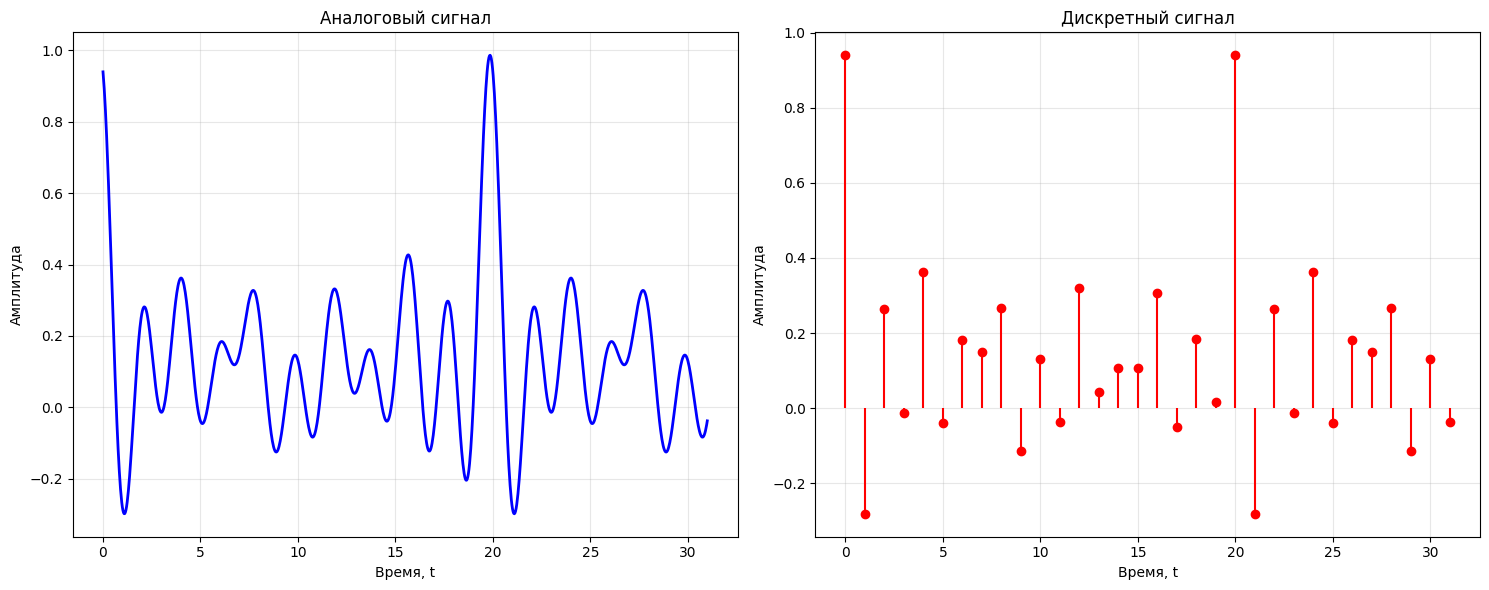

In [24]:
plt.figure(figsize=(15, 6))

# График 1: Аналоговый сигнал
plt.subplot(1, 2, 1)
t_analog = np.linspace(0, N * T, 1000)
signal_analog = np.zeros_like(t_analog)
for k in range(num_harmonics):
    signal_analog += A_k_normalized[k] * np.cos(frequencies[k] * t_analog + phi_k[k])

plt.plot(t_analog, signal_analog, 'b-', linewidth=2)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда')
plt.title('Аналоговый сигнал')
plt.grid(True, alpha=0.3)

# График 2: Дискретный сигнал
plt.subplot(1, 2, 2)
plt.stem(t, signal_discrete, linefmt='r-', markerfmt='ro', basefmt=' ')
plt.xlabel('Время, t')
plt.ylabel('Амплитуда')
plt.title('Дискретный сигнал')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Задание 3
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.


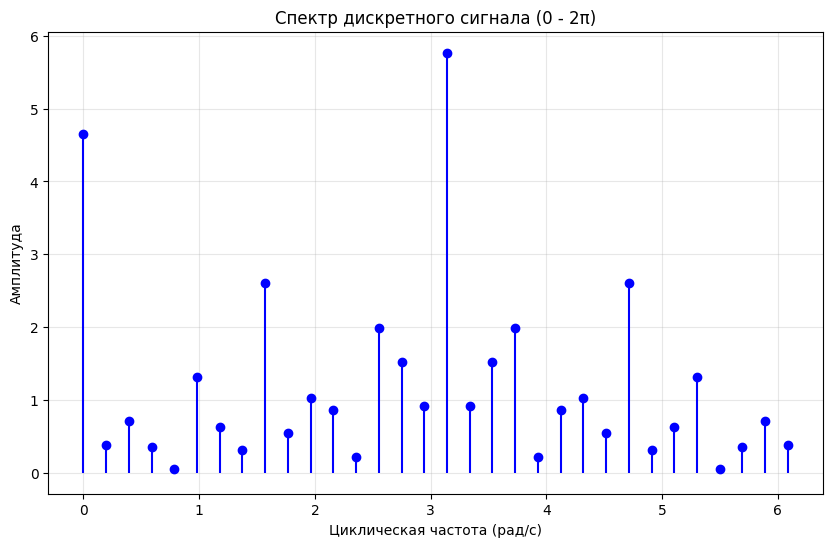

In [25]:
# Вычисление ДПФ
def manual_dft(signal):
    N = len(signal)
    spectrum = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            spectrum[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return spectrum

# Вычисляем спектр
spectrum = manual_dft(signal_discrete)

# Расчет частотной оси (0 - 2π)
freq_axis = [2 * math.pi * i / len(signal_discrete) for i in range(len(signal_discrete))]

# Визуализация спектра
plt.figure(figsize=(10, 6))
plt.stem(freq_axis, np.abs(spectrum), linefmt='b-', markerfmt='bo', basefmt=' ')
plt.xlabel('Циклическая частота (рад/с)')
plt.ylabel('Амплитуда')
plt.title('Спектр дискретного сигнала (0 - 2π)')
plt.grid(True, alpha=0.3)
plt.show()


## Задание 4
Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

In [26]:
# Функция для линейного сглаживания
def linear_smoothing(signal, window_size):
    N = len(signal)
    smoothed = np.zeros_like(signal)
    half_window = window_size // 2

    smoothed[0:half_window] = signal[0:half_window]
    smoothed[N-half_window:] = signal[N-half_window:]

    for n in range(half_window, N - half_window):
        if window_size == 5:
            smoothed[n] = (1/5) * (signal[n-2] + signal[n-1] + signal[n] +
                                 signal[n+1] + signal[n+2])
        elif window_size == 9:
            smoothed[n] = (1/9) * (signal[n-4] + signal[n-3] + signal[n-2] +
                                 signal[n-1] + signal[n] + signal[n+1] +
                                 signal[n+2] + signal[n+3] + signal[n+4])

    return smoothed

# Применяем сглаживание по 5 и 9 точкам
smoothed_5 = linear_smoothing(signal_discrete, 5)
smoothed_9 = linear_smoothing(signal_discrete, 9)

## Задание 5
Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

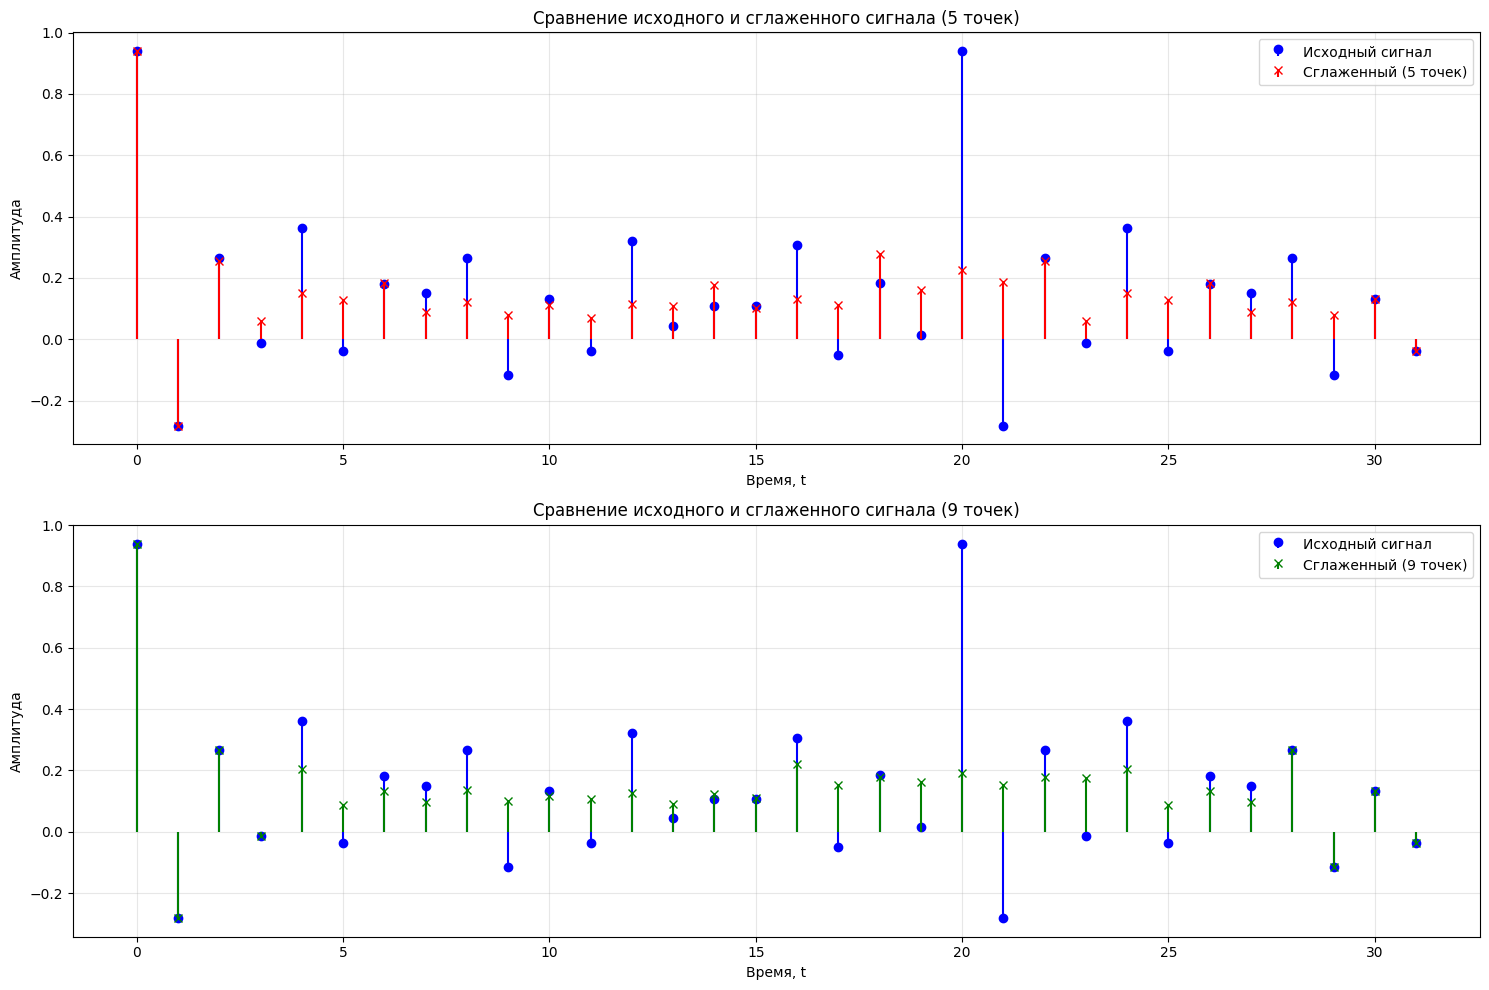

In [27]:
plt.figure(figsize=(15, 10))

# График 1: Сглаживание по 5 точкам
plt.subplot(2, 1, 1)
plt.stem(t, signal_discrete, linefmt='b-', markerfmt='bo', basefmt=' ', label='Исходный сигнал')
plt.stem(t, smoothed_5, linefmt='r-', markerfmt='rx', basefmt=' ', label='Сглаженный (5 точек)')
plt.xlabel('Время, t')
plt.ylabel('Амплитуда')
plt.title('Сравнение исходного и сглаженного сигнала (5 точек)')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Сглаживание по 9 точкам
plt.subplot(2, 1, 2)
plt.stem(t, signal_discrete, linefmt='b-', markerfmt='bo', basefmt=' ', label='Исходный сигнал')
plt.stem(t, smoothed_9, linefmt='g-', markerfmt='gx', basefmt=' ', label='Сглаженный (9 точек)')
plt.xlabel('Время, t')
plt.ylabel('Амплитуда')
plt.title('Сравнение исходного и сглаженного сигнала (9 точек)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Задание 6
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

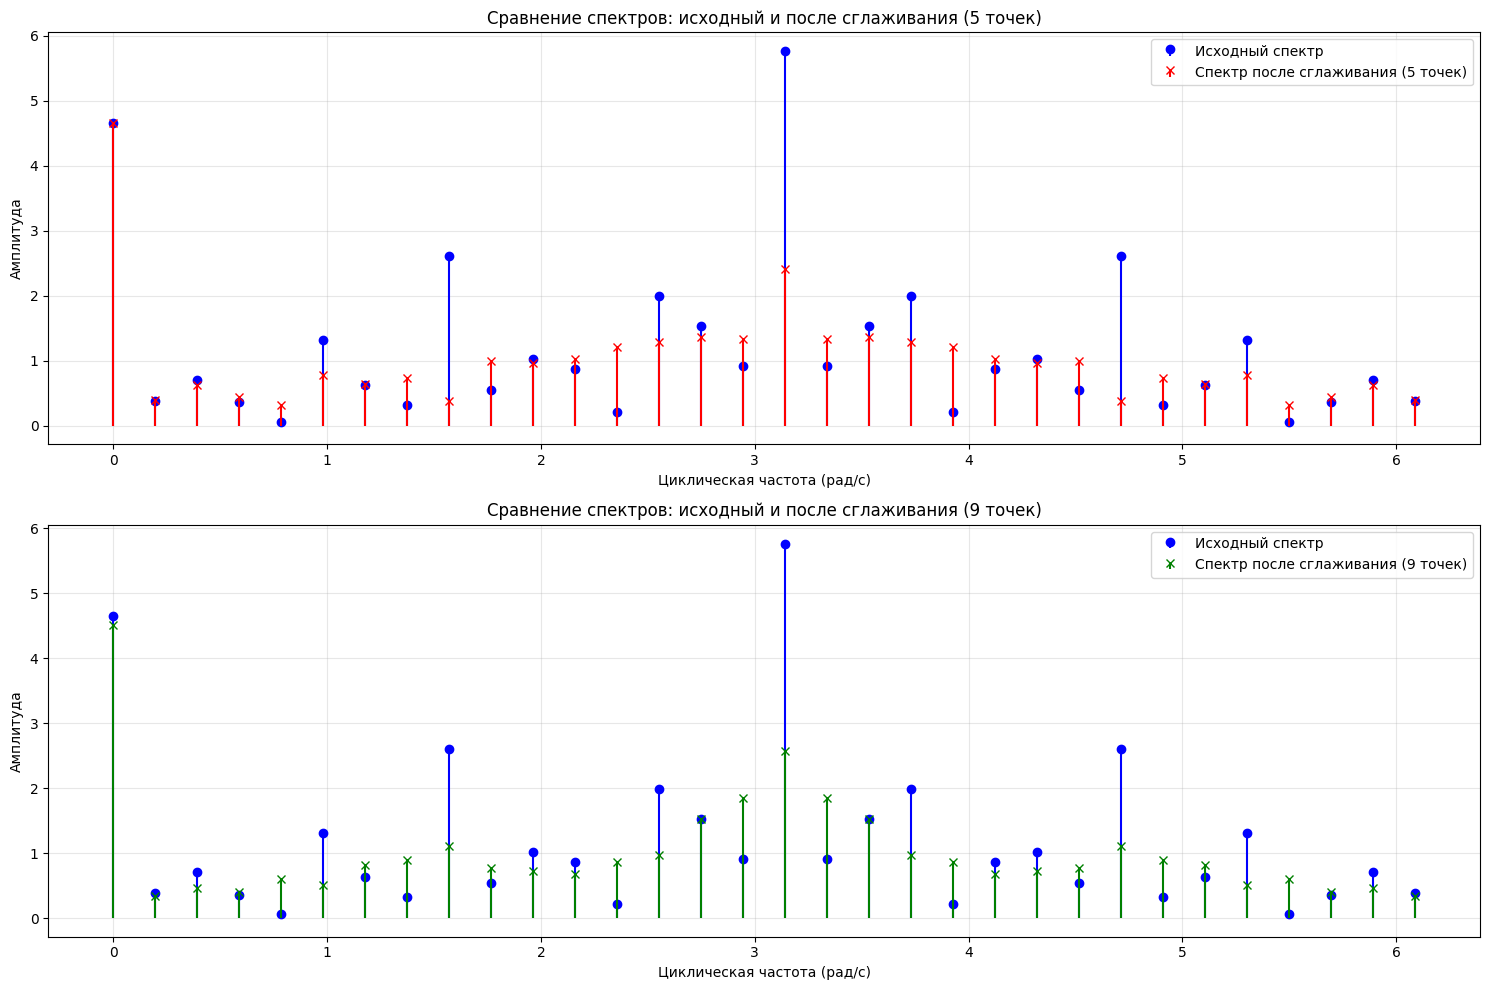

In [28]:
# Вычисляем ДПФ для сглаженных сигналов
spectrum_smoothed_5 = manual_dft(smoothed_5)
spectrum_smoothed_9 = manual_dft(smoothed_9)

# Полный диапазон частот (0-2π)
freq_axis_full = 2 * np.pi * np.arange(len(signal_discrete)) / len(signal_discrete)
plt.figure(figsize=(15, 10))

# График 1: Сравнение спектров (5 точек)
plt.subplot(2, 1, 1)
plt.stem(freq_axis_full, np.abs(spectrum), linefmt='b-', markerfmt='bo', basefmt=' ',
         label='Исходный спектр')
plt.stem(freq_axis_full, np.abs(spectrum_smoothed_5), linefmt='r-', markerfmt='rx', basefmt=' ',
         label='Спектр после сглаживания (5 точек)')
plt.xlabel('Циклическая частота (рад/с)')
plt.ylabel('Амплитуда')
plt.title('Сравнение спектров: исходный и после сглаживания (5 точек)')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Сравнение спектров (9 точек)
plt.subplot(2, 1, 2)
plt.stem(freq_axis_full, np.abs(spectrum), linefmt='b-', markerfmt='bo', basefmt=' ',
         label='Исходный спектр')
plt.stem(freq_axis_full, np.abs(spectrum_smoothed_9), linefmt='g-', markerfmt='gx', basefmt=' ',
         label='Спектр после сглаживания (9 точек)')
plt.xlabel('Циклическая частота (рад/с)')
plt.ylabel('Амплитуда')
plt.title('Сравнение спектров: исходный и после сглаживания (9 точек)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Задание 7
Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.


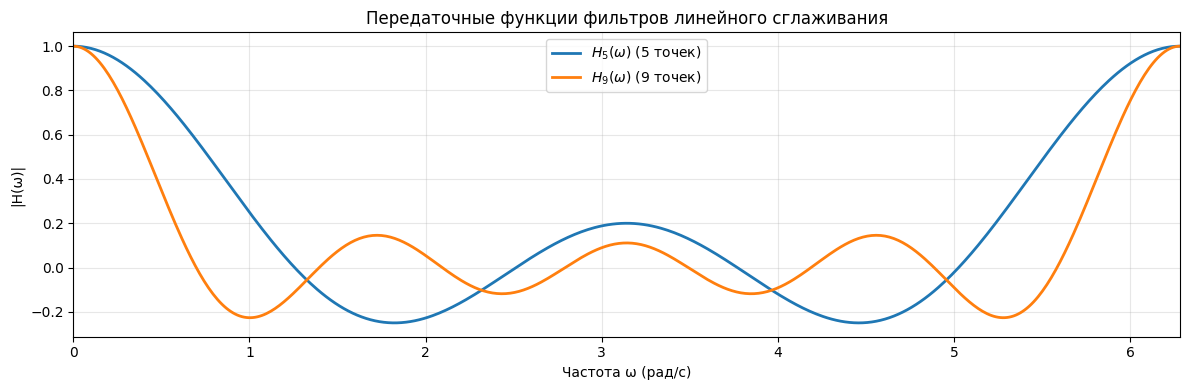

In [29]:
# Аналитическая передаточная функция для скользящего среднего
def H_analytical(w, h):
    if w == 0:
        return 1.0
    return 1 / (2 * h + 1) * np.sin(w * (h + 1/2)) / np.sin(w / 2)

w_range = np.linspace(0, 2 * np.pi, 500)

plt.figure(figsize=(12, 4))

for h in [2, 4]:
    window_size = 2 * h + 1
    plt.plot(w_range, [H_analytical(w, h) for w in w_range],
             linewidth=2,
             label=f'$H_{{{window_size}}}(\\omega)$ ({window_size} точек)')

plt.title('Передаточные функции фильтров линейного сглаживания')
plt.ylabel('|H(ω)|')
plt.xlabel('Частота ω (рад/с)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 2*np.pi)
plt.tight_layout()
plt.show()

### Анализ результатов линейного сглаживания

Оба фильтра работают как фильтры нижних частот - это видно и по теоретическим графикам, и по экспериментальным спектрам. Они пропускают низкие частоты и ослабляют высокие.

5-точечный фильтр слабее сглаживает сигнал и лучше сохраняет его детали. 9-точечный фильтр сильнее подавляет высокие частоты, поэтому сглаживает лучше, но некоторые детали сигнала теряются. На графиках спектров видно, что у 9-точечного фильтра высокие частоты уменьшаются больше, чем у 5-точечного. Это соответствует теоретическим кривым H(ω), где у 9-точечного фильтра полоса пропускания уже.Во временной области 9-точечный фильтр дает более плавный сигнал, а 5-точечный сохраняет больше особенностей исходного сигнала. Чем больше точек в фильтре, тем сильнее он подавляет высокие частоты.

## Задание 8
Повторить п. 4–7 для следующих фильтров:
- Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.
- Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

$H(\omega) = \cfrac{e^{i\omega} - e^{-i\omega}}{2} = i\sin(\omega)$

In [30]:
# Реализация фильтра численного дифференцирования 1-го порядка

def diff_filter_1st_order(signal):
    """
    Численное дифференцирование 1-го порядка
    Ядро: [-1/2, 0, 1/2] - центральная разностная схема
    """
    kernel = np.array([-0.5, 0.0, 0.5])
    return np.convolve(signal, kernel, mode='same')

# Применяем дифференцирование
diff_signal = diff_filter_1st_order(signal_discrete)

# Передаточная функция H(ω) для дифференцирования
def H_diff_theoretical(omega):
    """Аналитическая передаточная функция для дифференцирования 1-го порядка"""
    return 1j * np.sin(omega)


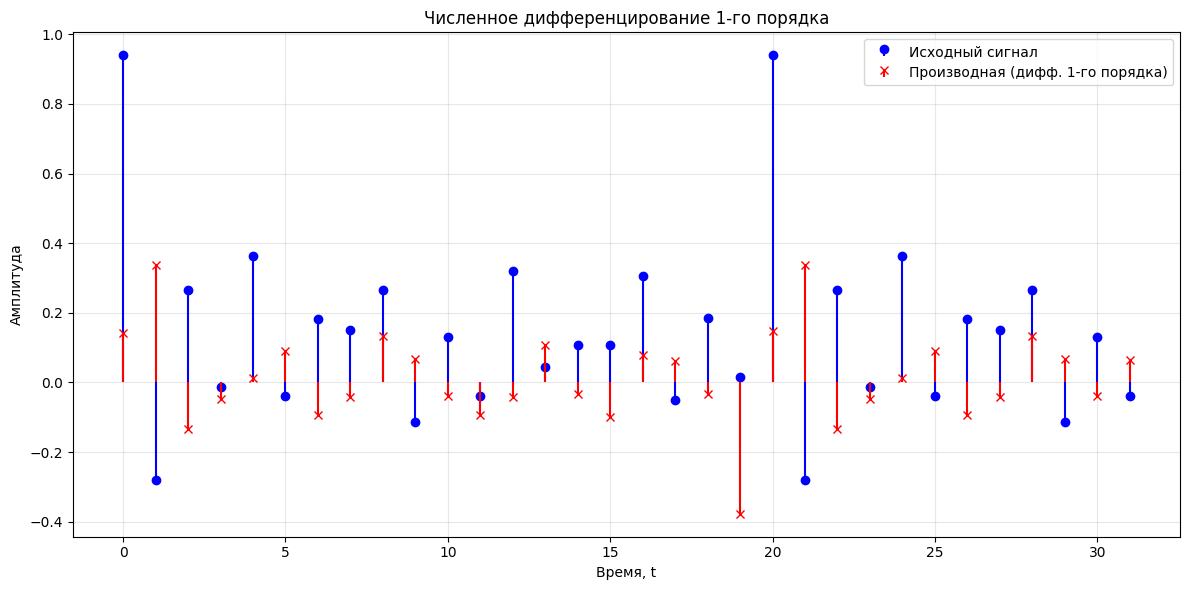

In [31]:
# Визуализация результатов дифференцирования

plt.figure(figsize=(12, 6))

plt.stem(t, signal_discrete, linefmt='b-', markerfmt='bo', basefmt=' ',
         label='Исходный сигнал')
plt.stem(t, diff_signal, linefmt='r-', markerfmt='rx', basefmt=' ',
         label='Производная (дифф. 1-го порядка)')

plt.xlabel('Время, t')
plt.ylabel('Амплитуда')
plt.title('Численное дифференцирование 1-го порядка')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

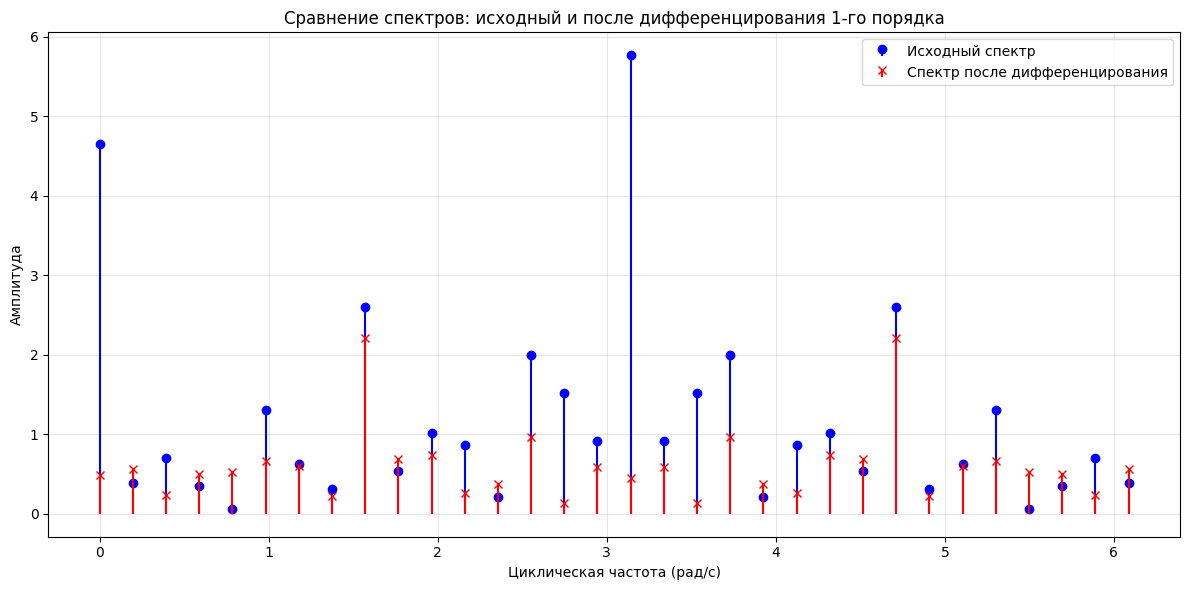

In [32]:
# Спектральный анализ после дифференцирования

# Вычисляем ДПФ для производной
spectrum_diff = manual_dft(diff_signal)

# Визуализация спектров в диапазоне 0-2π
plt.figure(figsize=(12, 6))

plt.stem(freq_axis_full, np.abs(spectrum), linefmt='b-', markerfmt='bo', basefmt=' ',
         label='Исходный спектр')
plt.stem(freq_axis_full, np.abs(spectrum_diff), linefmt='r-', markerfmt='rx', basefmt=' ',
         label='Спектр после дифференцирования')

plt.xlabel('Циклическая частота (рад/с)')
plt.ylabel('Амплитуда')
plt.title('Сравнение спектров: исходный и после дифференцирования 1-го порядка')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

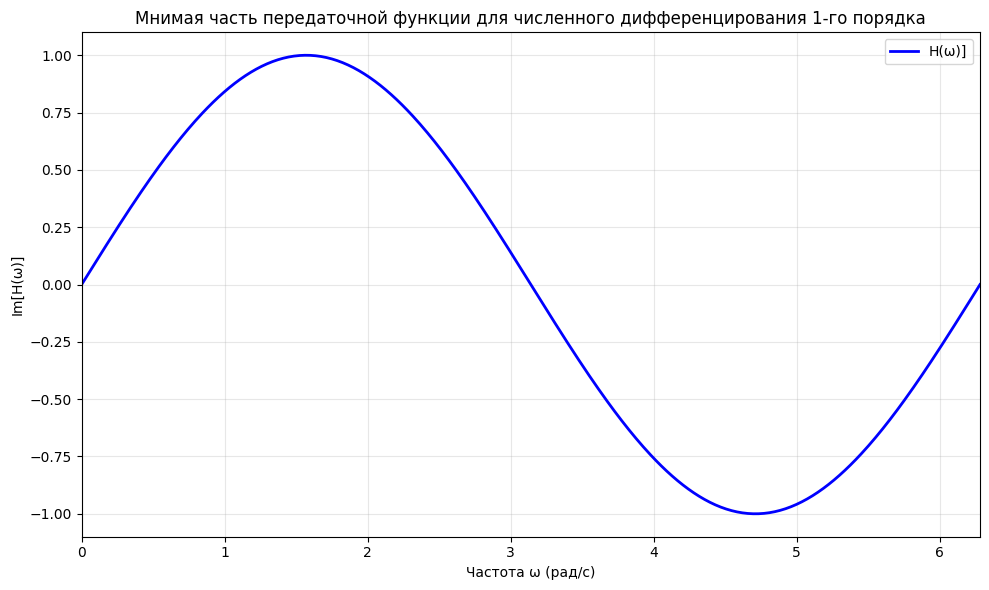

In [33]:
# Теоретическая передаточная функция дифференцирования

omega_range = np.linspace(0, 2 * np.pi, 500)
H_diff_imag = np.sin(omega_range)

plt.figure(figsize=(10, 6))
plt.plot(omega_range, H_diff_imag, 'b-', linewidth=2, label='H(ω)]')

plt.xlabel('Частота ω (рад/с)')
plt.ylabel('Im[H(ω)]')
plt.title('Мнимая часть передаточной функции для численного дифференцирования 1-го порядка')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 2*np.pi)
plt.ylim(-1.1, 1.1)

plt.tight_layout()
plt.show()

### Анализ работы дискретного фильтра численного дифференцирования 1-го порядка

Сравнивая спектр сигнала после фильтра с исходным, наблюдаем явное усиление амплитуд высокочастотных составляющих и ослабление низкочастотных. Это поведение согласуется с идеальной передаточной функцией численного дифференциатора первого порядка, имеющей вид $H (\omega) = i\omega$ , поскольку производная в частотной области соответствует умножению на $i\omega$.

В области низких частот ($\omega \to 0$) выполняется приближение $\sin(\omega) \approx \omega$, и фильтр ведёт себя почти как идеальный дифференциатор.

На высоких частотах, особенно близких к частоте Найквиста ($\omega \to \pi$), аппроксимация $|H(\omega)| = |\sin(\omega)|$ перестаёт быть линейной ($\omega$), что приводит к отклонению от идеальной характеристики и искажению производной для быстро меняющихся компонент сигнала.

Таким образом, дискретный фильтр корректно выполняет операцию численного дифференцирования в низкочастотной части спектра, однако его точность ограничена на высоких частотах из-за дискретности и метода аппроксимации, что подтверждается визуальным соответствием графиков спектров и теоретической $H(\omega)$.

 ## Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

Метод прямоугольников

Дифференциальное уравнение:
$y_{n+1} = y_n + s_{n+0.5}$

Передаточная функция:
$H(\omega) = \cfrac{1}{2i \cdot \sin(\omega/2)}$

Метод трапеций

Дифференциальное уравнение:
$y_{n+1} = y_n + \cfrac{1}{2} (s_n + s_{n+1})$

Передаточная функция:
$H(\omega) = \cfrac{\cos(\omega/2)}{2i \cdot \sin(\omega/2)}$

Метод Симпсона

Дифференциальное уравнение:
$y_{n+1} = y_{n-1} + \cfrac{1}{3} (s_{n-1} + 4s_{n} + s_{n+1})$

Передаточная функция:
$H(\omega) = \cfrac{2 + \cos(\omega)}{3i \cdot \sin(\omega)}$

In [34]:
# Реализация фильтров численного интегрирования

# Создаем аналоговый сигнал для метода прямоугольников
t_analog = np.linspace(0, N * T, 1000)
analog_signal = np.zeros(len(t_analog))
for k in range(num_harmonics):
    analog_signal += A_k_normalized[k] * np.cos(frequencies[k] * t_analog + phi_k[k])

# Метод прямоугольников
def integrate_rectangle(signal):
    N = len(signal)
    integrated = np.zeros(N, dtype=float)
    for i in range(1, N):
        integrated[i] = integrated[i-1] + signal[i]
    return integrated

# Метод трапеций
def integrate_trapezoid(signal):
    N = len(signal)
    integrated = np.zeros(N, dtype=float)
    for i in range(1, N):
        integrated[i] = integrated[i-1] + (signal[i-1] + signal[i]) / 2
    return integrated

# Метод Симпсона
def integrate_simpson(signal):
    N = len(signal)
    integrated = np.zeros(N, dtype=float)
    if N > 0:
        integrated[0] = 0
    if N > 1:
        integrated[1] = (signal[0] + signal[1]) / 2
    for i in range(2, N):
        if i < N-1:
            integrated[i] = integrated[i-1] + (signal[i-1] + 4*signal[i] + signal[i+1]) / 3
        else:
            integrated[i] = integrated[i-1] + (signal[i-1] + signal[i]) / 2
    return integrated

# Применяем фильтры интегрирования
integral_rect = integrate_rectangle(signal_discrete)
integral_trap = integrate_trapezoid(signal_discrete)
integral_simp = integrate_simpson(signal_discrete)


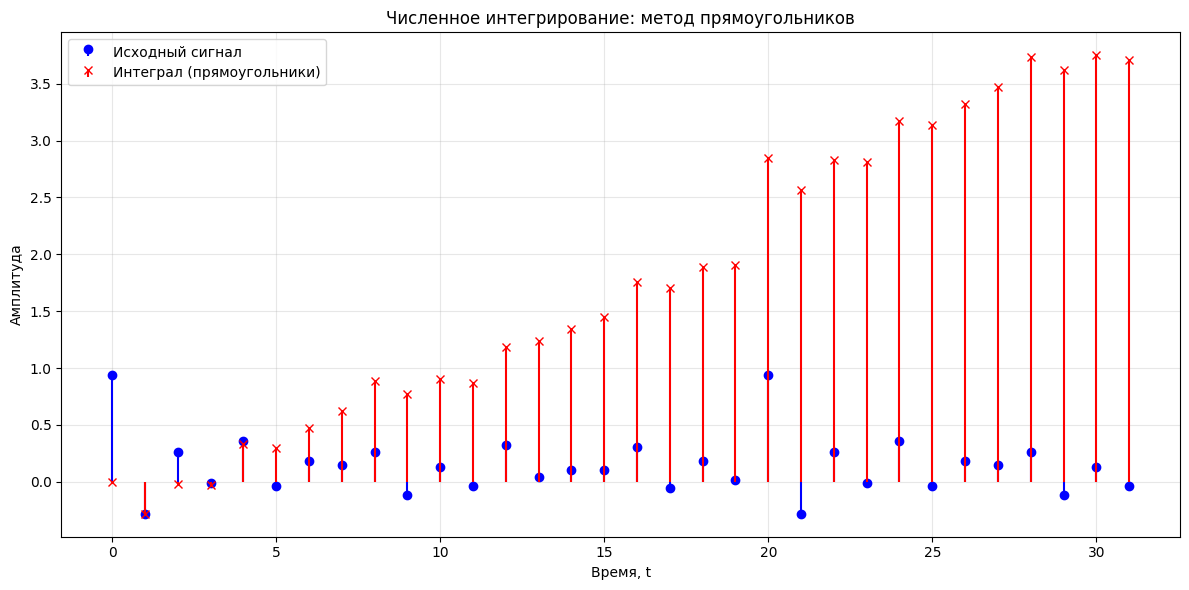

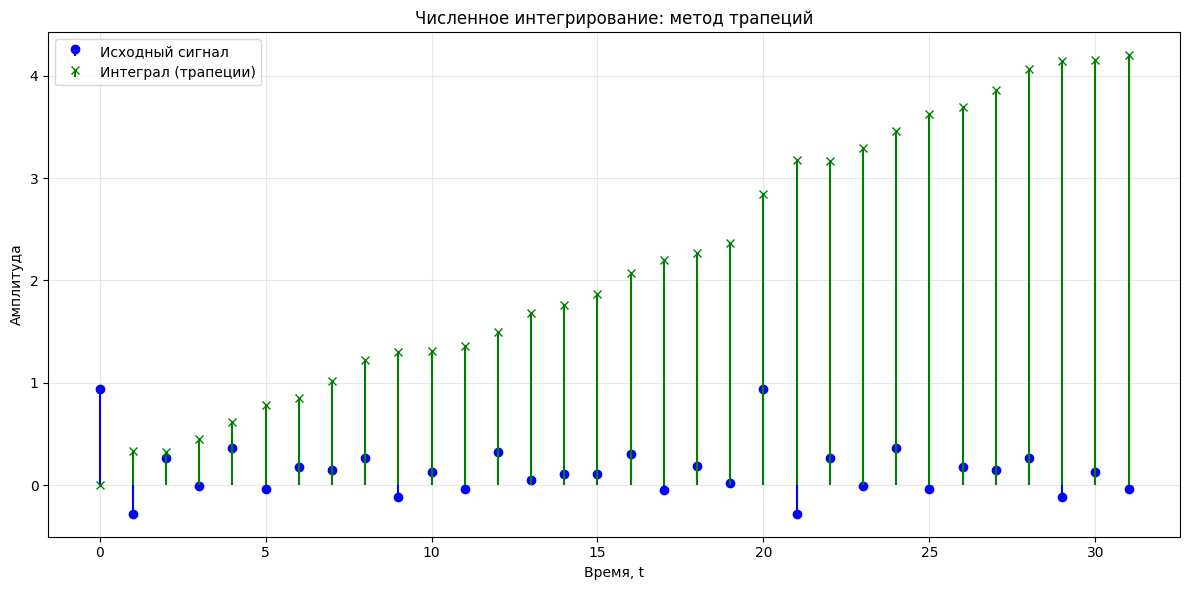

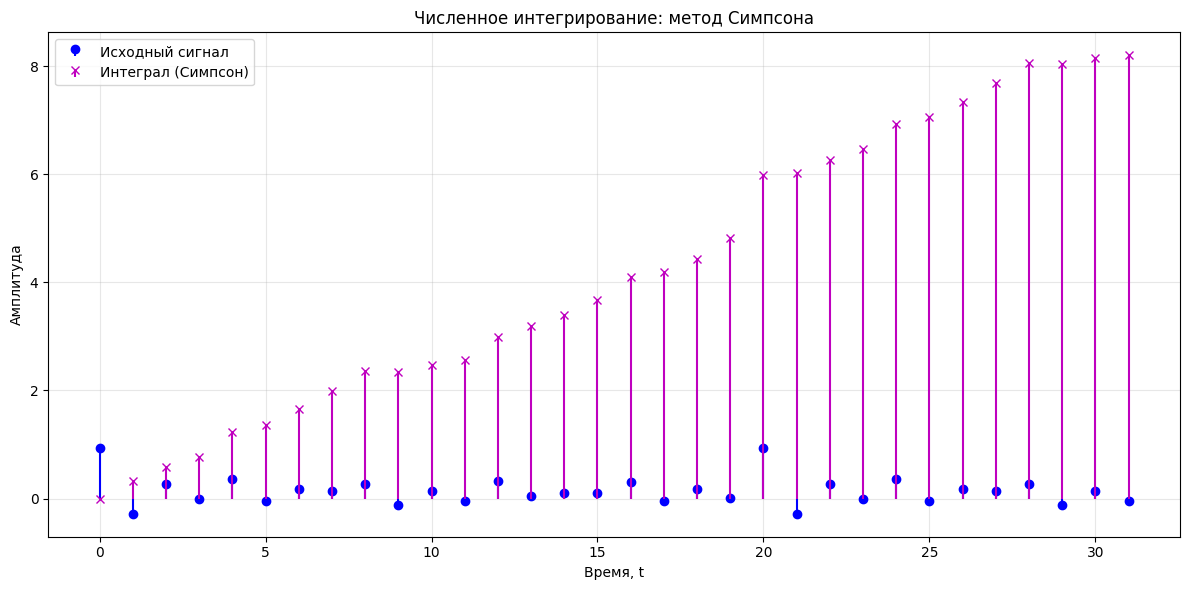

In [35]:
# Визуализация результатов интегрирования

# 1. Метод прямоугольников
plt.figure(figsize=(12, 6))
plt.stem(t, signal_discrete, linefmt='b-', markerfmt='bo', basefmt=' ',
         label='Исходный сигнал')
plt.stem(t, integral_rect, linefmt='r-', markerfmt='rx', basefmt=' ',
         label='Интеграл (прямоугольники)')
plt.xlabel('Время, t')
plt.ylabel('Амплитуда')
plt.title('Численное интегрирование: метод прямоугольников')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Метод трапеций
plt.figure(figsize=(12, 6))
plt.stem(t, signal_discrete, linefmt='b-', markerfmt='bo', basefmt=' ',
         label='Исходный сигнал')
plt.stem(t, integral_trap, linefmt='g-', markerfmt='gx', basefmt=' ',
         label='Интеграл (трапеции)')
plt.xlabel('Время, t')
plt.ylabel('Амплитуда')
plt.title('Численное интегрирование: метод трапеций')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Метод Симпсона
plt.figure(figsize=(12, 6))
plt.stem(t, signal_discrete, linefmt='b-', markerfmt='bo', basefmt=' ',
         label='Исходный сигнал')
plt.stem(t, integral_simp, linefmt='m-', markerfmt='mx', basefmt=' ',
         label='Интеграл (Симпсон)')
plt.xlabel('Время, t')
plt.ylabel('Амплитуда')
plt.title('Численное интегрирование: метод Симпсона')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

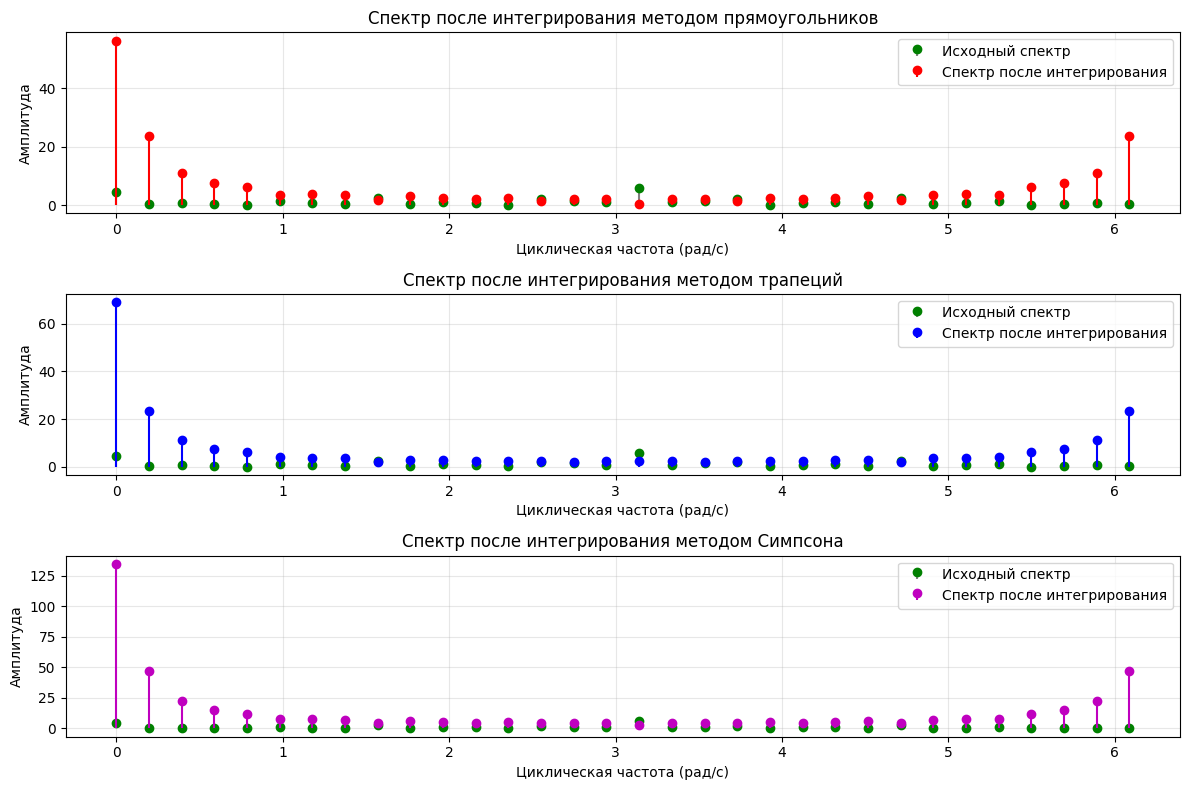

In [36]:
# Спектральный анализ после интегрирования

# Вычисляем ДПФ для интегралов
spectrum_rect = manual_dft(integral_rect)
spectrum_trap = manual_dft(integral_trap)
spectrum_simp = manual_dft(integral_simp)

# Частотная ось
freq_axis = 2 * np.pi * np.arange(len(signal_discrete)) / len(signal_discrete)

# Визуализация спектров
plt.figure(figsize=(12, 8))

# Спектр после интегрирования прямоугольниками
plt.subplot(3, 1, 1)
plt.stem(freq_axis, np.abs(spectrum), linefmt='gray', markerfmt='go', basefmt=' ', label='Исходный спектр')
plt.stem(freq_axis, np.abs(spectrum_rect), linefmt='r-', markerfmt='ro', basefmt=' ', label='Спектр после интегрирования')
plt.xlabel('Циклическая частота (рад/с)')
plt.ylabel('Амплитуда')
plt.title('Спектр после интегрирования методом прямоугольников')
plt.legend()
plt.grid(True, alpha=0.3)

# Спектр после интегрирования трапециями
plt.subplot(3, 1, 2)
plt.stem(freq_axis, np.abs(spectrum), linefmt='gray', markerfmt='go', basefmt=' ', label='Исходный спектр')
plt.stem(freq_axis, np.abs(spectrum_trap), linefmt='b-', markerfmt='bo', basefmt=' ', label='Спектр после интегрирования')
plt.xlabel('Циклическая частота (рад/с)')
plt.ylabel('Амплитуда')
plt.title('Спектр после интегрирования методом трапеций')
plt.legend()
plt.grid(True, alpha=0.3)

# Спектр после интегрирования Симпсоном
plt.subplot(3, 1, 3)
plt.stem(freq_axis, np.abs(spectrum), linefmt='gray', markerfmt='go', basefmt=' ', label='Исходный спектр')
plt.stem(freq_axis, np.abs(spectrum_simp), linefmt='m-', markerfmt='mo', basefmt=' ', label='Спектр после интегрирования')
plt.xlabel('Циклическая частота (рад/с)')
plt.ylabel('Амплитуда')
plt.title('Спектр после интегрирования методом Симпсона')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

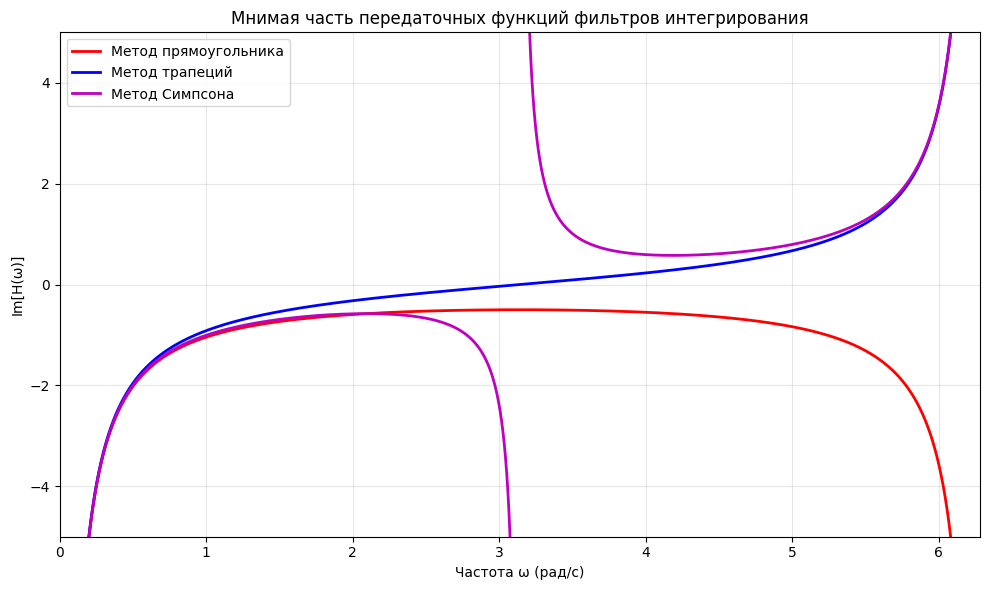

In [37]:
# Мнимые части передаточных функций для методов интегрирования

# Определение передаточных функций
def H_rect(omega):
    """Передаточная функция для метода прямоугольников"""
    return 1/(2j * np.sin(omega/2))

def H_trap(omega):
    """Передаточная функция для метода трапеций"""
    return np.cos(omega/2)/(2j * np.sin(omega/2))

def H_simp(omega):
    """Передаточная функция для метода Симпсона"""
    return (2 + np.cos(omega))/(3j * np.sin(omega))

# Диапазон частот 0.001 до 2π
omega_range = np.linspace(0.001, 2 * np.pi, 10000)

# Вычисление мнимых частей
H_rec_vals = np.imag(H_rect(omega_range))
H_trap_vals = np.imag(H_trap(omega_range))
H_simp_vals = np.imag(H_simp(omega_range))

# Замена значений вблизи разрыва на NaN (для Симпсона при ω=π)
H_simp_vals[np.abs(omega_range - np.pi) < 0.001] = np.nan

# Визуализация мнимых частей передаточных функций
plt.figure(figsize=(10, 6))

plt.plot(omega_range, H_rec_vals, 'r-', linewidth=2, label='Метод прямоугольника')
plt.plot(omega_range, H_trap_vals, 'b-', linewidth=2, label='Метод трапеций')
plt.plot(omega_range, H_simp_vals, 'm-', linewidth=2, label='Метод Симпсона')

plt.xlabel('Частота ω (рад/с)')
plt.ylabel('Im[H(ω)]')
plt.title('Мнимая часть передаточных функций фильтров интегрирования')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 2 * np.pi)  # ω в радианах (0-2π)
plt.ylim(-5, 5)  # Пределы оси Y как в коде 1

plt.tight_layout()
plt.show()

Сравнивая спектры сигналов после интегрирования с исходным спектром, наблюдаем усиление амплитуд низкочастотных составляющих и подавление высокочастотных компонент.

Метод прямоугольников и метод трапеций на низких частотах ($\omega \to 0$) приближаются к идеальному интегратору, но на высоких частотах ведут себя по-разному: метод трапеций полностью подавляет частоту Найквиста ($H(\pi) = 0$), тогда как метод прямоугольников сохраняет конечное усиление.

Метод Симпсона обеспечивает наиболее точную аппроксимацию идеального интегратора, особенно в средней полосе частот. Однако на высоких частотах он также отклоняется от идеальной характеристики, сохраняя ненулевое значение передаточной функции при $\omega = \pi$.

Таким образом, все три фильтра корректно выполняют операцию численного интегрирования в низкочастотной области, демонстрируя свойства фильтров нижних частот. Метод Симпсона является наиболее точным, но все методы ограничены в точности на высоких частотах из-за дискретности и аппроксимации производных, что подтверждается соответствием экспериментальных спектров теоретическим передаточным функциям.



## Выводы

В ходе лабораторной работы были успешно исследованы методы анализа и обработки дискретных сигналов. Был синтезирован и дискретизирован сигнал, проанализирован его спектр с помощью ДПФ. Изучены различные линейные фильтры: сглаживающие (скользящее среднее), дифференцирующий и интегрирующие. Экспериментально подтверждено, что их воздействие на сигнал во временной области (сглаживание, выделение производной/интеграла) полностью коррелирует с теоретическими частотными характеристиками в спектральной области: фильтры нижних частот подавляют высокие частоты, дифференцирующий фильтр их усиливает, а интегрирующие — подавляют, демонстрируя свойства ФНЧ. Работа наглядно показала связь между операциями свертки во временной области и умножением в частотной.

